## **Cancer Prediction**

**Problem Statement**<br>
Identifying whether individuals are facing cancer-related issues based on various analytical perspectives, considering factors such as age, gender, tumor characteristics, lifestyle habits, and family medical history.

**Data Understanding**
This dataset provides information related to individuals' health conditions, lifestyle habits, and tumor characteristics to determine the presence of cancer. The dataset includes the following features:

- Age – Represents the individual's age. Some values are missing.
- Gender – Specifies whether the individual is Male or Female.
- Tumor_Size – Indicates the size of the tumor in numerical values. Some data points are missing.
- Tumor_Grade – Represents the severity of the tumor (Low, Medium, High). Missing values exist.
- Symptoms_Severity – Defines the severity of symptoms (Mild, Moderate, etc.).
- Family_History – Shows whether there is a history of cancer in the family (Yes/No). Some missing values are observed.
- Smoking_History – Categorizes individuals based on smoking habits (Current Smoker, Former Smoker, etc.).
- Alcohol_Consumption – Represents alcohol intake levels (Low, Moderate, High). Some missing values exist.
- Exercise_Frequency – Describes how often the individual exercises (Regularly, Rarely, Occasionally, etc.). Missing values are observed.
- Cancer_Present – The target variable, where 1 indicates cancer presence and 0 indicates no cancer.


In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv(r"cancer_prediction_data (2).csv")
df.head()

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency,Cancer_Present
0,62.0,Male,9.763242,High,Mild,Yes,Former Smoker,Moderate,NaN,0
1,33.0,Male,7.946532,NaN,Moderate,Yes,Current Smoker,NaN,Regularly,1
2,33.0,Female,NaN,High,Moderate,No,Current Smoker,High,Rarely,1
3,58.0,Female,NaN,Low,Mild,NaN,Current Smoker,NaN,Rarely,1
4,NaN,Female,1.384231,Medium,Mild,No,Former Smoker,Moderate,Occasionally,1


**EDA**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df['Cancer_Present'].value_counts()

Cancer_Present
0    1017
1     983
Name: count, dtype: int64

<Axes: xlabel='Cancer_Present', ylabel='count'>

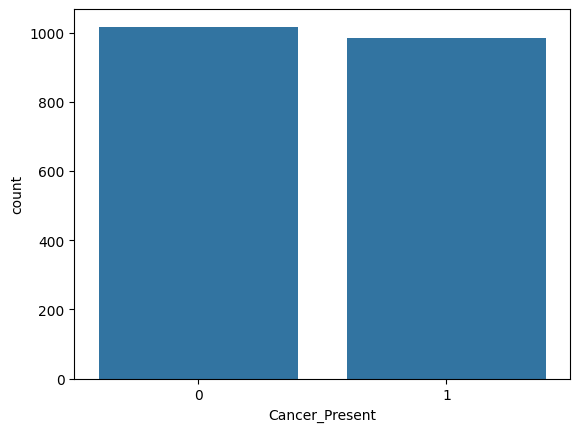

In [5]:
sns.countplot(x=df['Cancer_Present'])

<Axes: xlabel='Tumor_Grade'>

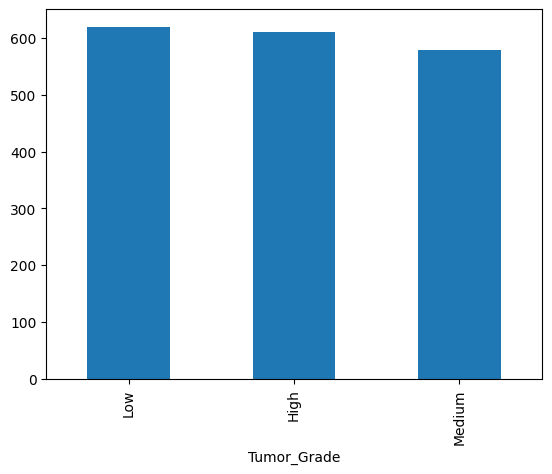

In [6]:
df['Tumor_Grade'].value_counts().plot(kind='bar')

<Axes: xlabel='Symptoms_Severity'>

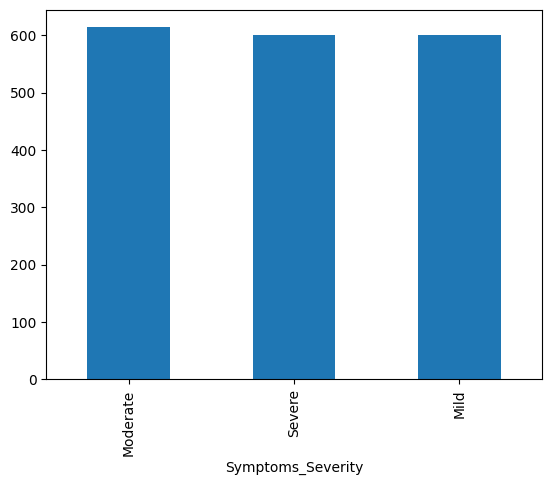

In [7]:
df['Symptoms_Severity'].value_counts().plot(kind='bar')

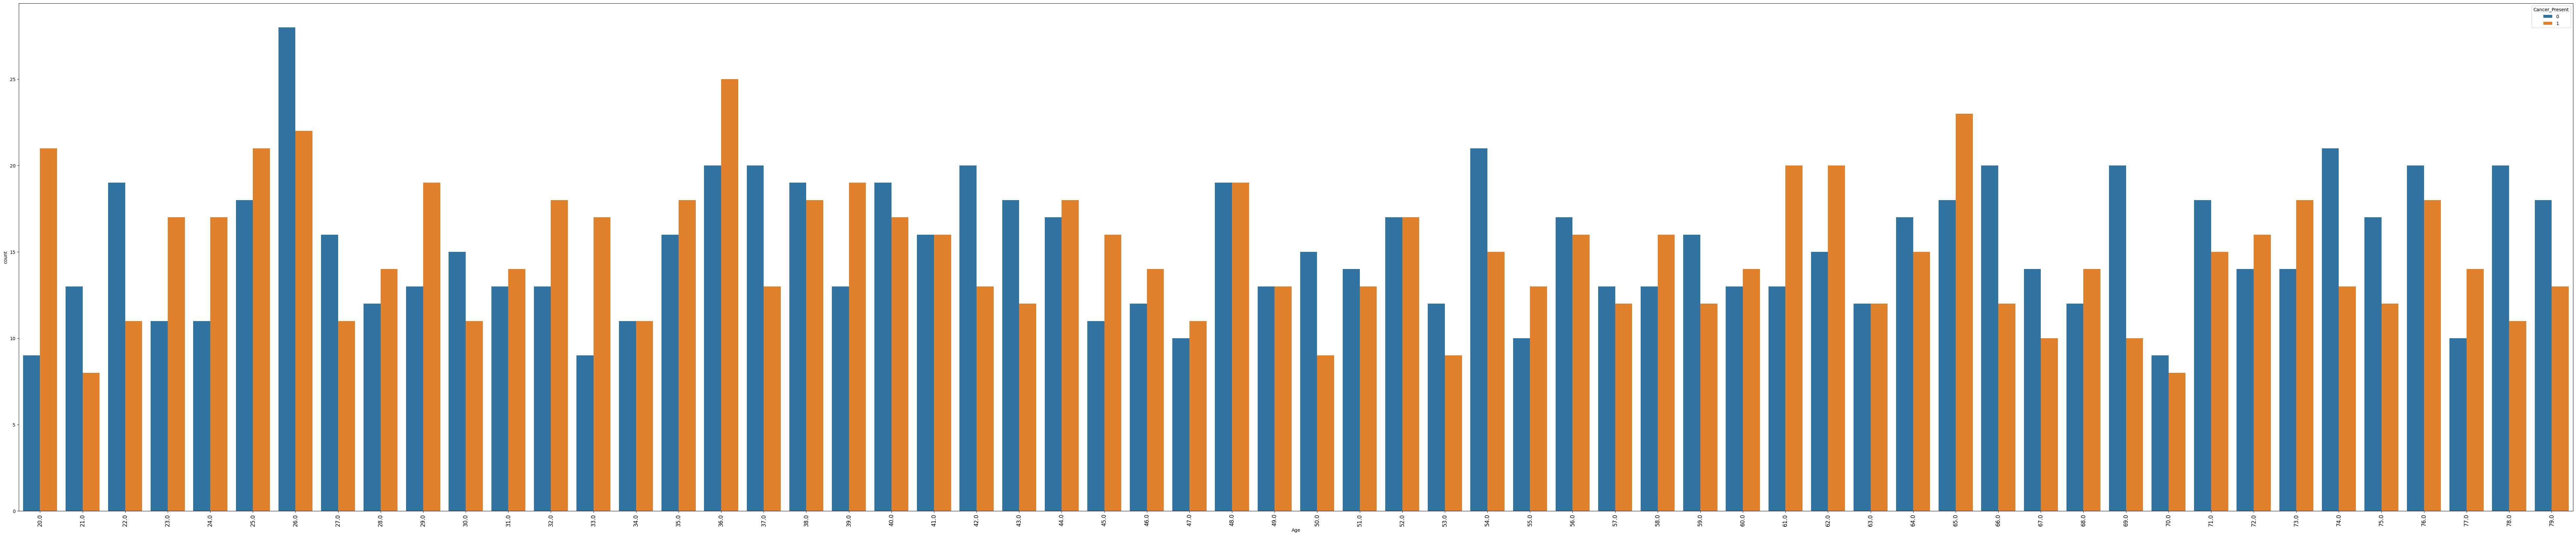

In [8]:
plt.figure(figsize=(100, 20))
sns.countplot(x=df['Age'],hue=df['Cancer_Present'])
plt.xticks(rotation=90, fontsize=12) 
plt.show()

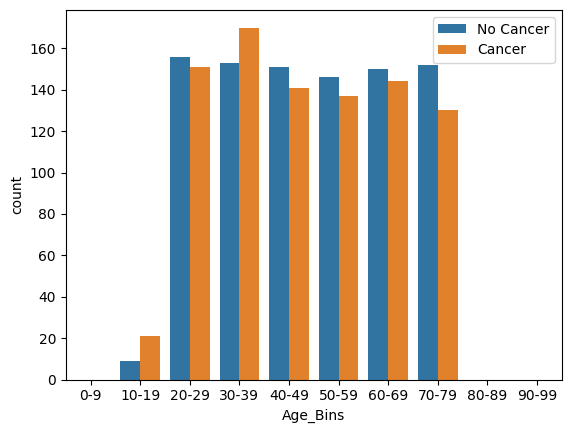

In [6]:
bin_edges = list(range(0, 101, 10))  
bin_labels = [f"{i}-{i+9}" for i in bin_edges[:-1]]  

df['Age_Bins'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, include_lowest=True)
sns.countplot(x=df['Age_Bins'], hue=df['Cancer_Present'])
plt.legend(["No Cancer", "Cancer"])

plt.show()
df.drop('Age_Bins',axis=1,inplace=True)

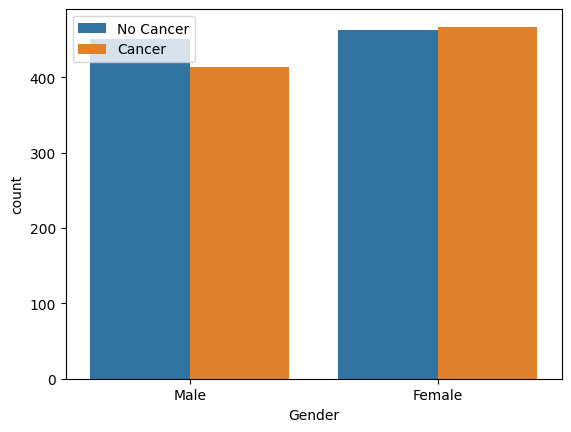

In [7]:
sns.countplot(x=df['Gender'],hue=df['Cancer_Present'])
plt.legend(["No Cancer", "Cancer"])

<Axes: xlabel='Tumor_Grade', ylabel='count'>

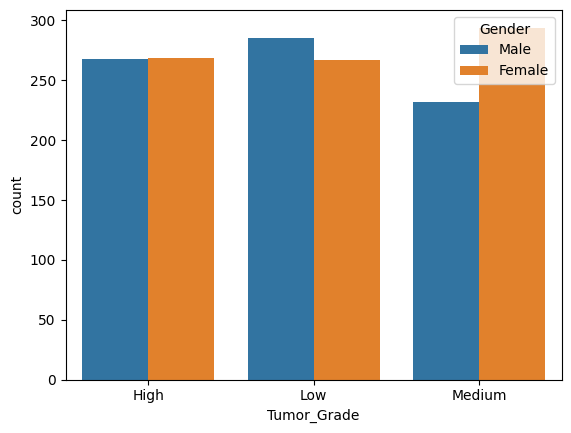

In [8]:
sns.countplot(x=df['Tumor_Grade'],hue=df['Gender'])

<Axes: xlabel='Cancer_Present', ylabel='count'>

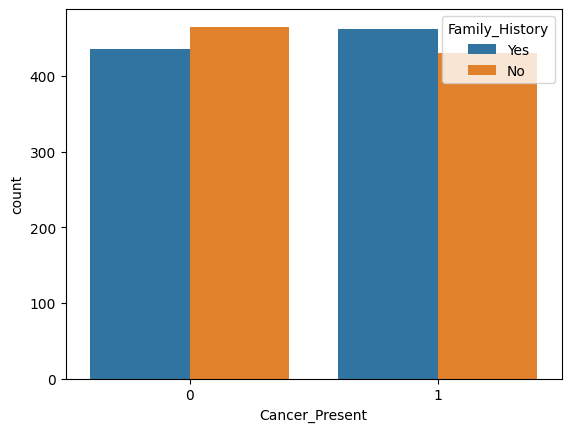

In [12]:
sns.countplot(x=df['Cancer_Present'],hue=df['Family_History'])

<Axes: xlabel='Gender', ylabel='None'>

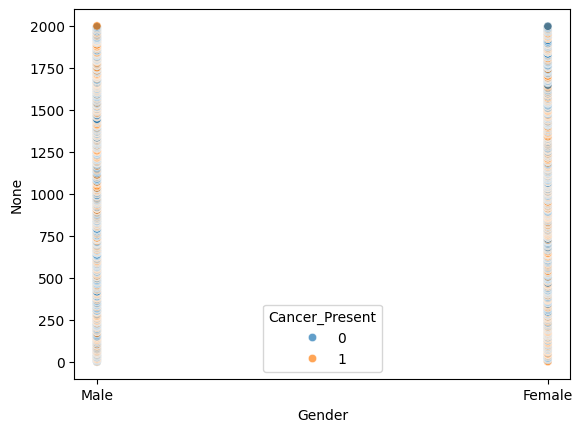

In [9]:
# sns.scatterplot(df['Age'],hue=df['Gender'])
sns.scatterplot(x=df['Gender'], y=df.index, hue=df['Cancer_Present'], alpha=0.7)

In [14]:
# %pip install pipeline

In [10]:
numeric = ['Age', 'Tumor_Size']
ordinal = ['Tumor_Grade', 'Symptoms_Severity', 'Alcohol_Consumption', 'Exercise_Frequency']
nominal = ['Gender','Family_History','Smoking_History',]



In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [12]:
numaric_preprocesssing = Pipeline([('Mean Imputer',SimpleImputer(strategy='mean')),
                                  ('Scaling',StandardScaler())])
(numaric_preprocesssing)

Pipeline(steps=[('Mean Imputer', SimpleImputer()),
                ('Scaling', StandardScaler())])

In [13]:
ordinal_preprocesssing = Pipeline([('mode Imputer',SimpleImputer(strategy='most_frequent')),
                                  ('Encoding',OrdinalEncoder())])
ordinal_preprocesssing

Pipeline(steps=[('mode Imputer', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OrdinalEncoder())])

In [14]:
nominal_preprocesssing = Pipeline([('mode Imputer',SimpleImputer(strategy='most_frequent')),
                                  ('Encoding',OneHotEncoder(sparse_output=False))])
nominal_preprocesssing

Pipeline(steps=[('mode Imputer', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OneHotEncoder(sparse_output=False))])

In [36]:
preprocessing = ColumnTransformer([('Numarical Transformer',numaric_preprocesssing,numeric),
                                  ('Ordinal Transformer',ordinal_preprocesssing,ordinal),
                                  ('Nominal Transformer',nominal_preprocesssing,nominal)],
                                 remainder='passthrough')

In [37]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numarical Transformer',
                                 Pipeline(steps=[('Mean Imputer',
                                                  SimpleImputer()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['Age', 'Tumor_Size']),
                                ('Ordinal Transformer',
                                 Pipeline(steps=[('mode Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OrdinalEncoder())]),
                                 ['Tumor_Grade', 'Symptoms_Severity',
                                  'Alcohol_Consumption',
                                  'Exercise_Frequency']),
                                ('Nominal Transformer',
                                 Pipeline(steps=[('mode Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Gender', 'Family_History',
                                  'Smoking_History'])])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
df.columns

Index(['Age', 'Gender', 'Tumor_Size', 'Tumor_Grade', 'Symptoms_Severity',
       'Family_History', 'Smoking_History', 'Alcohol_Consumption',
       'Exercise_Frequency', 'Cancer_Present'],
      dtype='object')

In [40]:
# df.drop('Age_Bins',axis=1,inplace=True)

In [42]:
# df.drop('Age_Bins',axis=1,inplace=True)
x=df.drop('Cancer_Present',axis=1)
y=df['Cancer_Present']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [45]:
DT = Pipeline([('Preprocess',preprocessing),
               ('Model',DecisionTreeClassifier())])
li = Pipeline([('Preprocess',preprocessing),
               ('Model',LogisticRegression())])
knn = Pipeline([('Preprocess',preprocessing),
               ('Model',KNeighborsClassifier())])
svc = Pipeline([('Preprocess',preprocessing),
               ('Model',SVC())])
rf = Pipeline([('Preprocess',preprocessing),
               ('Model',RandomForestClassifier())])
gn = Pipeline([('Preprocess',preprocessing),
               ('Model',GaussianNB())])

In [46]:
gn.fit(x_train,y_train).score(x_test,y_test)

0.48

In [49]:
rf.fit(x_train,y_train).score(x_test,y_test)

0.4875

In [50]:
import pickle 
with open(r"cancer_prediction.pkl",'wb') as file:
    pickle.dump(rf,file)

In [51]:
svc.fit(x_train,y_train).score(x_test,y_test)

0.435

In [52]:
knn.fit(x_train,y_train).score(x_test,y_test)

0.45

In [130]:
li.fit(x_train,y_train).score(x_test,y_test)

0.4262295081967213

In [102]:
DT.fit(x_train,y_train).score(x_test,y_test)

0.5245901639344263

In [129]:
with open("cancer_prediction.pkl",'wb') as file:
    pickle.dump(DT,file)

In [55]:
# %pip install Xgboost
from xgboost import XGBClassifier


In [ ]:
# x_train

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency
968,28.0,Male,4.850319,High,Mild,Yes,Non-Smoker,High,Never
240,53.0,Male,1.260145,Low,Severe,Yes,Non-Smoker,NaN,NaN
819,57.0,Female,4.522107,Low,Moderate,Yes,Non-Smoker,NaN,Occasionally
692,24.0,Female,9.880829,Medium,Moderate,No,Non-Smoker,Moderate,Regularly
420,37.0,Female,8.057191,High,Severe,Yes,Non-Smoker,High,Never
...,...,...,...,...,...,...,...,...,...
1130,76.0,Female,4.457319,Low,Moderate,NaN,Former Smoker,High,Occasionally
1294,78.0,Male,2.918106,Low,Mild,No,NaN,High,Rarely
860,68.0,Female,4.614431,Medium,Mild,Yes,Former Smoker,High,Occasionally
1459,20.0,Male,8.040769,Low,Severe,No,Non-Smoker,NaN,Occasionally


In [66]:
df=df.dropna()

In [71]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
df['Gender']=ohe.fit_transform(df[['Gender']])
df['Family_History']=ohe.fit_transform(df[['Family_History']])

df[['Gender', 'Family_History']]=ohe.fit_transform(df[['Gender', 'Family_History']])

C:\Users\vempa\AppData\Local\Temp\ipykernel_20364\1193760888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=ohe.fit_transform(df[['Gender']])
C:\Users\vempa\AppData\Local\Temp\ipykernel_20364\1193760888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_History']=ohe.fit_transform(df[['Family_History']])
C:\Users\vempa\AppData\Local\Temp\ipykernel_20364\1193760888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [73]:
from sklearn.preprocessing import OrdinalEncoder
lb=LabelEncoder()
ord=OrdinalEncoder()

df['Tumor_Grade']=ord.fit_transform(df[['Tumor_Grade']])
df['Smoking_History']=ord.fit_transform(df[['Smoking_History']])
df['Alcohol_Consumption']=ord.fit_transform(df[['Alcohol_Consumption']])
df['Exercise_Frequency']=ord.fit_transform(df[['Exercise_Frequency']])

C:\Users\vempa\AppData\Local\Temp\ipykernel_20364\380572421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tumor_Grade']=ord.fit_transform(df[['Tumor_Grade']])
C:\Users\vempa\AppData\Local\Temp\ipykernel_20364\380572421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoking_History']=ord.fit_transform(df[['Smoking_History']])
C:\Users\vempa\AppData\Local\Temp\ipykernel_20364\380572421.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [77]:
df['Symptoms_Severity']=ord.fit_transform(df[['Symptoms_Severity']])

C:\Users\vempa\AppData\Local\Temp\ipykernel_20364\2011411676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Symptoms_Severity']=ord.fit_transform(df[['Symptoms_Severity']])


In [78]:
df

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency,Cancer_Present
5,38.0,1.0,3.435983,2.0,1.0,0.0,0.0,2.0,2.0,0
7,36.0,1.0,8.007844,0.0,1.0,1.0,2.0,0.0,0.0,0
11,72.0,1.0,7.910548,1.0,2.0,1.0,0.0,1.0,2.0,0
14,65.0,1.0,6.672062,1.0,0.0,0.0,0.0,0.0,0.0,1
15,55.0,1.0,5.815395,2.0,1.0,1.0,0.0,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
1992,59.0,1.0,4.851739,1.0,0.0,1.0,2.0,0.0,3.0,1
1993,34.0,1.0,9.640306,0.0,0.0,1.0,0.0,0.0,1.0,0
1994,74.0,1.0,1.142385,1.0,0.0,0.0,0.0,1.0,2.0,0
1996,57.0,0.0,5.542532,0.0,1.0,1.0,1.0,0.0,1.0,1


In [83]:
x=df.drop('Cancer_Present',axis=1)
y=df['Cancer_Present']

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=27)

In [127]:
# df.isna().sum()
xgb=XGBClassifier()
xgb.fit(x_train,y_train).score(x_test,y_test)

0.4672131147540984